In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import rasterio as rio
import arcpy
import seaborn as sns
import os, glob
from tifffile import imsave
import cv2
#import gdal
from osgeo import gdal
import os, arcpy
from arcpy import env
from rasterstats import zonal_stats
%matplotlib inline


In [3]:
file_path=r'EU_data/mmr_2/misschien/boundary_2.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

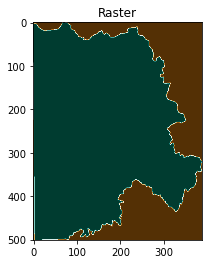

In [4]:
plt.imshow(luc_mmr, cmap="BrBG")
plt.title("Raster")
plt.show()

In [5]:
type(luc_mmr)

numpy.ndarray

In [6]:
list(map(tuple, np.where(np.isnan(luc_mmr))))

[(), ()]

In [6]:
file_path=r'EU_data/mmr_2/misschien/mmr_1996_tochwel.tif'
with rio.open(file_path) as dem_src:
    luc_1996 = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [7]:
luc_1996[luc_1996==11] = 31
luc_1996[luc_1996==0] = 20
luc_1996[luc_1996==1] = 21
luc_1996[luc_1996==3] = 23
luc_1996[luc_1996==4] = 24
luc_1996[luc_1996==5] = 25
luc_1996[luc_1996==6] = 26
luc_1996[luc_1996==8] = 28
luc_1996[luc_1996==7] = 27
luc_1996[luc_1996==9] = 29
luc_1996[luc_1996==10] = 30
luc_1996[luc_1996==2] = 22

luc_1996[luc_1996==31] = 10
luc_1996[luc_1996==20] = 11
luc_1996[luc_1996==21] = 0
luc_1996[luc_1996==23] = 1
luc_1996[luc_1996==24] = 2
luc_1996[luc_1996==25] = 3
luc_1996[luc_1996==26] = 4
luc_1996[luc_1996==28] = 5
luc_1996[luc_1996==27] = 8
luc_1996[luc_1996==29] = 6
luc_1996[luc_1996==30] = 7
luc_1996[luc_1996==22] = 9

In [8]:
type(luc_1996)

numpy.ndarray

In [15]:
outputPath = r'EU_data/mmr_2/mmr_land/mmr_land_1996_final_osm_nodes_raster_with_extent_Q10.tif'
cv2.imwrite(outputPath, luc_1996)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

In [17]:
file_path=r'EU_data/mmr_2/mmr_land/mmr_boundary_raster_final.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [20]:
luc_mmr[100,100]

1.0

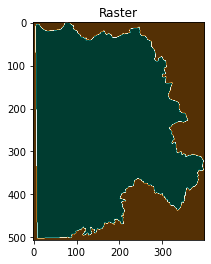

In [19]:
plt.imshow(luc_mmr, cmap="BrBG")
plt.title("Raster")
plt.show()

In [10]:

file_path=r'EU_data/mmr_2/mmr_land/mmr_land_1996_final_osm_nodes_raster_with_extent_updated.tif'
with rio.open(file_path) as dem_src:
    luc_1996 = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

            #rainfall_data = cv2.imread(file_path ,0)
    #luc_1996=gdal.Open(file_path)

In [11]:
luc_1996

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

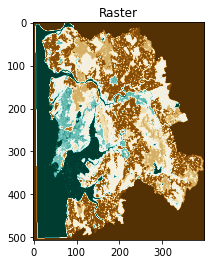

In [12]:
plt.imshow(luc_1996, cmap="BrBG")
plt.title("Raster")
plt.show()

In [13]:
luc_1996[luc_1996==11] = 31
luc_1996[luc_1996==0] = 20
luc_1996[luc_1996==1] = 21
luc_1996[luc_1996==3] = 23
luc_1996[luc_1996==4] = 24
luc_1996[luc_1996==5] = 25
luc_1996[luc_1996==6] = 26
luc_1996[luc_1996==8] = 28
luc_1996[luc_1996==7] = 27
luc_1996[luc_1996==9] = 29
luc_1996[luc_1996==10] = 30
luc_1996[luc_1996==2] = 22

luc_1996[luc_1996==31] = 10
luc_1996[luc_1996==20] = 11
luc_1996[luc_1996==21] = 0
luc_1996[luc_1996==23] = 1
luc_1996[luc_1996==24] = 2
luc_1996[luc_1996==25] = 3
luc_1996[luc_1996==26] = 4
luc_1996[luc_1996==28] = 5
luc_1996[luc_1996==27] = 8
luc_1996[luc_1996==29] = 6
luc_1996[luc_1996==30] = 7
luc_1996[luc_1996==22] = 9

In [14]:
luc_1996

array([[11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.],
       ...,
       [11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.]], dtype=float32)

In [15]:
outputPath = r'EU_data/mmr_2/mmr_land/mmr_land_1996_final_osm_nodes_raster_with_extent_Q6.tif'
cv2.imwrite(outputPath, luc_1996)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

In [3]:

file_path=r'EU_data/mmr_2/mmr_land/mmr_landuse_2016_final9.tif'
with rio.open(file_path) as dem_src:
    luc_2016 = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()
    

In [4]:
np.unique(luc_2016)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=uint8)

In [5]:
luc_2016[luc_2016==11] = 31
luc_2016[luc_2016==0] = 20
luc_2016[luc_2016==1] = 21
luc_2016[luc_2016==3] = 23
luc_2016[luc_2016==4] = 24
luc_2016[luc_2016==5] = 25
luc_2016[luc_2016==6] = 26
luc_2016[luc_2016==8] = 28
luc_2016[luc_2016==7] = 27
luc_2016[luc_2016==9] = 29
luc_2016[luc_2016==10] = 30
luc_2016[luc_2016==2] = 22

luc_2016[luc_2016==31] = 10
luc_2016[luc_2016==20] = 11
luc_2016[luc_2016==21] = 0
luc_2016[luc_2016==23] = 1
luc_2016[luc_2016==24] = 2
luc_2016[luc_2016==25] = 3
luc_2016[luc_2016==26] = 4
luc_2016[luc_2016==28] = 5
luc_2016[luc_2016==27] = 8
luc_2016[luc_2016==29] = 6
luc_2016[luc_2016==30] = 7
luc_2016[luc_2016==22] = 9

In [8]:
outputPath = r'EU_data/mmr_2/mmr_land/mmr_landuse_2016_final10.tif'
cv2.imwrite(outputPath, luc_2016)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

Enrichment-curves switchback

In [6]:
file_path=r'EU_data/mmr_2/mmr_landuse_2016_final.tif'
with rio.open(file_path) as dem_src:
    luc_2016 = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [7]:
luc_2016[luc_2016==0] = 20
luc_2016[luc_2016==1] = 21
luc_2016[luc_2016==2] = 22
luc_2016[luc_2016==3] = 23
luc_2016[luc_2016==4] = 24
luc_2016[luc_2016==5] = 25
luc_2016[luc_2016==6] = 26
luc_2016[luc_2016==7] = 27
luc_2016[luc_2016==8] = 28
luc_2016[luc_2016==9] = 29
luc_2016[luc_2016==10] = 30
luc_2016[luc_2016==11] = 31

luc_2016[luc_2016==20] = 1
luc_2016[luc_2016==21] = 2
luc_2016[luc_2016==22] = 3
luc_2016[luc_2016==23] = 4
luc_2016[luc_2016==24] = 5
luc_2016[luc_2016==25] = 6
luc_2016[luc_2016==26] = 7
luc_2016[luc_2016==27] = 8
luc_2016[luc_2016==28] = 9
luc_2016[luc_2016==29] = 10
luc_2016[luc_2016==30] = 11
luc_2016[luc_2016==31] = 0

In [8]:
outputPath = r'EU_data/mmr_2/mmr_landuse_2016_original.tif'
cv2.imwrite(outputPath, luc_2016)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

In [9]:
file_path=r'EU_data/mmr_2/mmr_landuse_1996_final.tif'
with rio.open(file_path) as dem_src:
    luc_2016 = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [10]:
luc_2016[luc_2016==0] = 20
luc_2016[luc_2016==1] = 21
luc_2016[luc_2016==2] = 22
luc_2016[luc_2016==3] = 23
luc_2016[luc_2016==4] = 24
luc_2016[luc_2016==5] = 25
luc_2016[luc_2016==6] = 26
luc_2016[luc_2016==7] = 27
luc_2016[luc_2016==8] = 28
luc_2016[luc_2016==9] = 29
luc_2016[luc_2016==10] = 30
luc_2016[luc_2016==11] = 31

luc_2016[luc_2016==20] = 1
luc_2016[luc_2016==21] = 2
luc_2016[luc_2016==22] = 3
luc_2016[luc_2016==23] = 4
luc_2016[luc_2016==24] = 5
luc_2016[luc_2016==25] = 6
luc_2016[luc_2016==26] = 7
luc_2016[luc_2016==27] = 8
luc_2016[luc_2016==28] = 9
luc_2016[luc_2016==29] = 10
luc_2016[luc_2016==30] = 11
luc_2016[luc_2016==31] = 0

In [12]:
outputPath = r'EU_data/mmr_2/mmr_landuse_1996_original.tif'
cv2.imwrite(outputPath, luc_2016)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

make framework

In [4]:
file_path=r'EU_data/mmr_2/mmr_boundary_raster_final.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [6]:
luc_mmr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
luc_mmr[luc_mmr==1]=0

In [19]:
outputPath = r'EU_data/mmr_2/mmr_frame.tif'
cv2.imwrite(outputPath, luc_mmr)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

In [30]:
import geopandas as gpd
df = gpd.read_file('EU_data/mmr_2/cessed.shp')
df.head()

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,1.029690e+06,8.048601e+09,"MULTIPOLYGON (((270914.379 2095425.671, 270914..."
1,0,0,3.750496e+02,1.615913e+03,"POLYGON ((271497.550 2093977.680, 271494.111 2..."
2,0,0,6.095992e+01,1.294298e+02,"POLYGON ((272946.922 2102202.693, 272950.310 2..."
3,0,0,3.727112e+01,7.245881e+01,"POLYGON ((271172.775 2096962.338, 271178.209 2..."
4,0,0,6.086911e+01,1.999778e+02,"POLYGON ((269815.528 2092160.228, 269796.527 2..."


In [31]:
df.iloc[1:,0]=1

In [33]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/cessed_2.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [34]:
df

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,1.029690e+06,8.048601e+09,"MULTIPOLYGON (((270914.379 2095425.671, 270914..."
1,1,0,3.750496e+02,1.615913e+03,"POLYGON ((271497.550 2093977.680, 271494.111 2..."
2,1,0,6.095992e+01,1.294298e+02,"POLYGON ((272946.922 2102202.693, 272950.310 2..."
3,1,0,3.727112e+01,7.245881e+01,"POLYGON ((271172.775 2096962.338, 271178.209 2..."
4,1,0,6.086911e+01,1.999778e+02,"POLYGON ((269815.528 2092160.228, 269796.527 2..."
...,...,...,...,...,...
3066,1,0,2.003122e+02,1.143019e+03,"POLYGON ((269356.465 2091476.918, 269377.194 2..."
3067,1,0,2.064025e+02,9.242149e+02,"POLYGON ((269504.664 2091531.438, 269513.498 2..."
3068,1,0,5.202851e+02,2.655069e+03,"POLYGON ((269295.178 2091880.866, 269301.251 2..."
3069,1,0,6.636712e+02,3.871185e+03,"POLYGON ((271007.086 2093222.582, 271010.592 2..."


In [1]:
import geopandas as gpd
df = gpd.read_file('EU_data/mmr_2/CRZ/CRZ B.shp')
df.head()

,Type,Id,geometry
0,Intertidal Zone,None,"POLYGON ((72.98013 18.69821, 72.98018 18.69700..."
1,Intertidal Zone,None,"POLYGON ((72.98385 18.69598, 72.98377 18.69602..."
2,Intertidal Zone,None,"POLYGON ((72.99231 18.69694, 72.99265 18.69702..."
3,Intertidal Zone,None,"POLYGON ((72.96291 18.71355, 72.96311 18.71350..."
4,Intertidal Zone,None,"POLYGON ((72.96470 18.73109, 72.96460 18.73124..."


In [4]:
df.iloc[0:,1]=1

In [5]:
df

,Type,Id,geometry
0,Intertidal Zone,1,"POLYGON ((72.98013 18.69821, 72.98018 18.69700..."
1,Intertidal Zone,1,"POLYGON ((72.98385 18.69598, 72.98377 18.69602..."
2,Intertidal Zone,1,"POLYGON ((72.99231 18.69694, 72.99265 18.69702..."
3,Intertidal Zone,1,"POLYGON ((72.96291 18.71355, 72.96311 18.71350..."
4,Intertidal Zone,1,"POLYGON ((72.96470 18.73109, 72.96460 18.73124..."
...,...,...,...
140,Intertidal Zone,1,"POLYGON ((73.09677 18.99269, 73.09664 18.99287..."
141,Intertidal Zone,1,"POLYGON ((73.09702 18.99255, 73.09680 18.99265..."
142,Intertidal Zone,1,"POLYGON ((73.08671 19.00104, 73.08658 19.00089..."
143,Intertidal Zone,1,"POLYGON ((73.08470 19.01215, 73.08380 19.01175..."


In [6]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/CRZ/cRZ_B_2.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [7]:
df

,Type,Id,geometry
0,Intertidal Zone,1,"POLYGON ((72.98013 18.69821, 72.98018 18.69700..."
1,Intertidal Zone,1,"POLYGON ((72.98385 18.69598, 72.98377 18.69602..."
2,Intertidal Zone,1,"POLYGON ((72.99231 18.69694, 72.99265 18.69702..."
3,Intertidal Zone,1,"POLYGON ((72.96291 18.71355, 72.96311 18.71350..."
4,Intertidal Zone,1,"POLYGON ((72.96470 18.73109, 72.96460 18.73124..."
...,...,...,...
140,Intertidal Zone,1,"POLYGON ((73.09677 18.99269, 73.09664 18.99287..."
141,Intertidal Zone,1,"POLYGON ((73.09702 18.99255, 73.09680 18.99265..."
142,Intertidal Zone,1,"POLYGON ((73.08671 19.00104, 73.08658 19.00089..."
143,Intertidal Zone,1,"POLYGON ((73.08470 19.01215, 73.08380 19.01175..."


In [35]:
import geopandas as gpd
df = gpd.read_file('EU_data/mmr_2/I_A.shp')
df.head()


,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,2.053340e+06,7.831568e+09,"MULTIPOLYGON (((278958.253 2061251.623, 278947..."
1,0,0,3.650877e+03,2.918655e+05,"POLYGON ((285252.248 2113248.224, 285274.698 2..."
2,0,0,3.394965e+03,3.053134e+05,"POLYGON ((285729.669 2114709.296, 285790.343 2..."
3,0,0,4.282552e+03,2.350657e+05,"POLYGON ((285466.537 2097616.429, 285492.753 2..."
4,0,0,1.792646e+04,3.276683e+06,"POLYGON ((292281.738 2100831.787, 292366.041 2..."


In [36]:
df.iloc[1:,0]=1

In [37]:
df

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,2.053340e+06,7.831568e+09,"MULTIPOLYGON (((278958.253 2061251.623, 278947..."
1,1,0,3.650877e+03,2.918655e+05,"POLYGON ((285252.248 2113248.224, 285274.698 2..."
2,1,0,3.394965e+03,3.053134e+05,"POLYGON ((285729.669 2114709.296, 285790.343 2..."
3,1,0,4.282552e+03,2.350657e+05,"POLYGON ((285466.537 2097616.429, 285492.753 2..."
4,1,0,1.792646e+04,3.276683e+06,"POLYGON ((292281.738 2100831.787, 292366.041 2..."
...,...,...,...,...,...
644,1,0,1.651403e+03,4.169547e+04,"POLYGON ((286060.244 2094871.014, 286310.412 2..."
645,1,0,3.137064e+03,7.816863e+04,"POLYGON ((285751.000 2094452.868, 285753.591 2..."
646,1,0,1.604304e+03,4.393564e+04,"POLYGON ((286465.994 2094423.436, 286461.130 2..."
647,1,0,2.512214e+04,7.782842e+05,"POLYGON ((284863.780 2091445.276, 284872.050 2..."


In [38]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/CRZ/I_A.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [12]:
df

,Type,geometry,Id
0,Mudlfats,"POLYGON ((72.95875 19.10094, 72.95896 19.10099...",1
1,Mudlfats,"POLYGON ((72.96312 19.11418, 72.96369 19.11475...",1
2,Mudlfats,"POLYGON ((72.96251 18.95978, 72.96275 18.95988...",1
3,Mudlfats,"POLYGON ((73.02686 18.98952, 73.02767 18.98902...",1
4,Mudlfats,"POLYGON ((72.98216 19.15506, 72.98199 19.15446...",1
...,...,...,...
643,50m Mangrove Buffer Zone,"POLYGON ((72.96844 18.93504, 72.97082 18.93487...",1
644,50m Mangrove Buffer Zone,"POLYGON ((72.96555 18.93123, 72.96556 18.93240...",1
645,50m Mangrove Buffer Zone,"POLYGON ((72.97234 18.93104, 72.97229 18.93138...",1
646,50m Mangrove Buffer Zone,"POLYGON ((72.95746 18.90397, 72.95754 18.90391...",1


In [39]:
import geopandas as gpd
df = gpd.read_file('EU_data/mmr_2/I_B_2.shp')
df.head()


,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,1,0,361600.0,8.055520e+09,"MULTIPOLYGON (((284708.632 2072567.529, 284757..."
1,0,0,0.0,0.000000e+00,"POLYGON ((286992.975 2068640.156, 286996.567 2..."
2,0,0,0.0,0.000000e+00,"POLYGON ((287382.939 2068388.574, 287374.982 2..."
3,0,0,0.0,0.000000e+00,"POLYGON ((288276.132 2068484.015, 288312.485 2..."
4,0,0,0.0,0.000000e+00,"POLYGON ((285195.756 2070357.945, 285217.260 2..."


In [40]:
df.iloc[0,0]=0
df.iloc[1:,0]=1

In [41]:
df

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,361600.0,8.055520e+09,"MULTIPOLYGON (((284708.632 2072567.529, 284757..."
1,1,0,0.0,0.000000e+00,"POLYGON ((286992.975 2068640.156, 286996.567 2..."
2,1,0,0.0,0.000000e+00,"POLYGON ((287382.939 2068388.574, 287374.982 2..."
3,1,0,0.0,0.000000e+00,"POLYGON ((288276.132 2068484.015, 288312.485 2..."
4,1,0,0.0,0.000000e+00,"POLYGON ((285195.756 2070357.945, 285217.260 2..."
...,...,...,...,...,...
141,1,0,0.0,0.000000e+00,"POLYGON ((299646.873 2101101.740, 299633.562 2..."
142,1,0,0.0,0.000000e+00,"POLYGON ((299672.960 2101086.606, 299650.036 2..."
143,1,0,0.0,0.000000e+00,"POLYGON ((298598.069 2102038.156, 298584.121 2..."
144,1,0,0.0,0.000000e+00,"POLYGON ((298399.623 2103269.926, 298304.444 2..."


In [42]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/CRZ/I_B.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [43]:
import geopandas as gpd
df = gpd.read_file('EU_data/mmr_2/III.shp')
df.head()


,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,1,0,440889.138582,8.045229e+09,"MULTIPOLYGON (((279064.386 2080000.292, 279051..."
1,0,0,3481.805710,3.288722e+05,"POLYGON ((276808.886 2062000.884, 276816.307 2..."
2,0,0,1639.327579,1.536140e+05,"POLYGON ((274603.215 2068990.015, 274548.395 2..."
3,0,0,6708.726310,8.423499e+05,"POLYGON ((275109.672 2066006.763, 275085.583 2..."
4,0,0,5163.288276,6.801127e+05,"POLYGON ((275280.329 2071067.311, 275223.835 2..."


In [44]:
df.iloc[0,0]=0
df.iloc[1:,0]=1

In [45]:
df

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,440889.138582,8.045229e+09,"MULTIPOLYGON (((279064.386 2080000.292, 279051..."
1,1,0,3481.805710,3.288722e+05,"POLYGON ((276808.886 2062000.884, 276816.307 2..."
2,1,0,1639.327579,1.536140e+05,"POLYGON ((274603.215 2068990.015, 274548.395 2..."
3,1,0,6708.726310,8.423499e+05,"POLYGON ((275109.672 2066006.763, 275085.583 2..."
4,1,0,5163.288276,6.801127e+05,"POLYGON ((275280.329 2071067.311, 275223.835 2..."
5,1,0,4300.011195,4.129499e+05,"POLYGON ((275002.516 2063854.620, 274986.443 2..."
6,1,0,2723.063098,2.891610e+05,"POLYGON ((280497.682 2078625.689, 280490.914 2..."
7,1,0,617.042438,1.661227e+04,"POLYGON ((280110.360 2078516.803, 280115.288 2..."
8,1,0,289.347721,3.868062e+03,"POLYGON ((279919.839 2078494.011, 279916.461 2..."
9,1,0,14006.132462,1.928091e+06,"POLYGON ((277254.185 2079715.950, 277253.255 2..."


In [46]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/CRZ/III.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [47]:
import geopandas as gpd
df = gpd.read_file('EU_data/mmr_2/IV.shp')
df.head()


,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,1,0,877531.273506,7.895196e+09,"MULTIPOLYGON (((292430.704 2101177.240, 292403..."
1,0,0,0.000000,0.000000e+00,"POLYGON ((299276.904 2109266.339, 299292.382 2..."
2,0,0,0.000000,0.000000e+00,"POLYGON ((300168.584 2107039.175, 300109.945 2..."
3,0,0,0.000000,0.000000e+00,"POLYGON ((268079.622 2124089.672, 268071.580 2..."
4,0,0,0.000000,0.000000e+00,"POLYGON ((288166.800 2087340.535, 288111.181 2..."


In [48]:
df.iloc[0,0]=0
df.iloc[1:,0]=1

In [49]:
df

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,877531.273506,7.895196e+09,"MULTIPOLYGON (((292430.704 2101177.240, 292403..."
1,1,0,0.000000,0.000000e+00,"POLYGON ((299276.904 2109266.339, 299292.382 2..."
2,1,0,0.000000,0.000000e+00,"POLYGON ((300168.584 2107039.175, 300109.945 2..."
3,1,0,0.000000,0.000000e+00,"POLYGON ((268079.622 2124089.672, 268071.580 2..."
4,1,0,0.000000,0.000000e+00,"POLYGON ((288166.800 2087340.535, 288111.181 2..."
5,1,0,0.000000,0.000000e+00,"POLYGON ((299426.597 2084540.126, 299473.430 2..."
6,1,0,0.000000,0.000000e+00,"POLYGON ((298468.145 2083449.861, 298425.880 2..."
7,1,0,0.000000,0.000000e+00,"POLYGON ((296689.046 2080902.860, 296710.605 2..."
8,1,0,0.000000,0.000000e+00,"POLYGON ((297435.842 2081501.534, 297511.612 2..."
9,1,0,0.000000,0.000000e+00,"POLYGON ((264126.402 2157692.672, 264256.436 2..."


In [50]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/CRZ/IV.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [51]:
import geopandas as gpd
df = gpd.read_file('EU_data/mmr_2/NDZ.shp')
df.head()


,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,1,0,916249.301188,8.040197e+09,"MULTIPOLYGON (((277699.348 2061242.958, 277720..."
1,1,0,0.000000,0.000000e+00,"POLYGON ((279562.369 2060623.671, 279563.628 2..."
2,1,0,0.000000,0.000000e+00,"POLYGON ((278869.686 2060632.634, 278869.404 2..."
3,1,0,0.000000,0.000000e+00,"POLYGON ((278828.585 2060893.711, 278865.189 2..."
4,1,0,0.000000,0.000000e+00,"POLYGON ((276768.439 2062045.897, 276834.222 2..."


In [52]:
df.iloc[0,0]=0
df.iloc[1:,0]=1

In [53]:
df

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,916249.301188,8.040197e+09,"MULTIPOLYGON (((277699.348 2061242.958, 277720..."
1,1,0,0.000000,0.000000e+00,"POLYGON ((279562.369 2060623.671, 279563.628 2..."
2,1,0,0.000000,0.000000e+00,"POLYGON ((278869.686 2060632.634, 278869.404 2..."
3,1,0,0.000000,0.000000e+00,"POLYGON ((278828.585 2060893.711, 278865.189 2..."
4,1,0,0.000000,0.000000e+00,"POLYGON ((276768.439 2062045.897, 276834.222 2..."
...,...,...,...,...,...
335,1,0,0.000000,0.000000e+00,"POLYGON ((288922.830 2085091.616, 289080.661 2..."
336,1,0,0.000000,0.000000e+00,"POLYGON ((288192.643 2084548.735, 288207.312 2..."
337,1,0,0.000000,0.000000e+00,"POLYGON ((291979.724 2082077.764, 291966.749 2..."
338,1,0,0.000000,0.000000e+00,"POLYGON ((292412.125 2082151.201, 292391.582 2..."


In [54]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/CRZ/NDZ.shp'

# Write the data into that Shapefile
df.to_file(outfp)

## Hopelijk laatste

In [1]:
import geopandas as gpd

In [3]:
df = gpd.read_file('EU_data/mmr_2/CRZ-9-9/CRZ_1A-v1.shp')
df.head()

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,2.500909e+06,7.708087e+09,"MULTIPOLYGON (((278354.221 2061167.400, 278307..."
1,0,0,3.420235e+03,3.316841e+05,"POLYGON ((278149.891 2062229.332, 278157.789 2..."
2,0,0,3.357470e+03,1.699120e+05,"POLYGON ((294543.624 2079792.027, 294526.114 2..."
3,0,0,4.853095e+02,9.291535e+03,"POLYGON ((295251.687 2080662.360, 295249.291 2..."
4,0,0,2.331254e+03,6.771138e+04,"POLYGON ((295165.200 2080712.583, 295174.111 2..."


In [4]:
df.iloc[0,0]=0
df.iloc[1:,0]=1
df

In [6]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/CRZ-9-9/cRZ_1A-v2.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [18]:
df = gpd.read_file('EU_data/mmr_2/CRZ-9-9/CRZ_IB_V1.shp')
df.head()

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,1.636577e+06,7.963559e+09,"MULTIPOLYGON (((284708.632 2072567.529, 284757..."
1,0,0,0.000000e+00,0.000000e+00,"POLYGON ((261892.230 2153470.168, 261876.801 2..."
2,0,0,0.000000e+00,0.000000e+00,"POLYGON ((261244.650 2154622.828, 261226.665 2..."
3,0,0,0.000000e+00,0.000000e+00,"POLYGON ((286992.975 2068640.156, 286996.567 2..."
4,0,0,0.000000e+00,0.000000e+00,"POLYGON ((287382.939 2068388.574, 287374.982 2..."


In [21]:
df.iloc[0,0]=0
df.iloc[1:,0]=1

IndexError: single positional indexer is out-of-bounds

In [11]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/CRZ-9-9/cRZ_1B-v2.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [12]:
df = gpd.read_file('EU_data/mmr_2/CRZ-9-9/CRZ_NDZ_v1.shp')
df.head()

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,1.399562e+06,8.029764e+09,"MULTIPOLYGON (((277699.348 2061242.958, 277720..."
1,0,0,0.000000e+00,0.000000e+00,"POLYGON ((279562.369 2060623.671, 279563.628 2..."
2,0,0,0.000000e+00,0.000000e+00,"POLYGON ((278869.686 2060632.634, 278869.404 2..."
3,0,0,0.000000e+00,0.000000e+00,"POLYGON ((278828.585 2060893.711, 278865.189 2..."
4,0,0,0.000000e+00,0.000000e+00,"POLYGON ((276768.439 2062045.897, 276834.222 2..."


In [13]:
df.iloc[0,0]=0
df.iloc[1:,0]=1
df

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,1.399562e+06,8.029764e+09,"MULTIPOLYGON (((277699.348 2061242.958, 277720..."
1,1,0,0.000000e+00,0.000000e+00,"POLYGON ((279562.369 2060623.671, 279563.628 2..."
2,1,0,0.000000e+00,0.000000e+00,"POLYGON ((278869.686 2060632.634, 278869.404 2..."
3,1,0,0.000000e+00,0.000000e+00,"POLYGON ((278828.585 2060893.711, 278865.189 2..."
4,1,0,0.000000e+00,0.000000e+00,"POLYGON ((276768.439 2062045.897, 276834.222 2..."
...,...,...,...,...,...
733,1,0,0.000000e+00,0.000000e+00,"POLYGON ((283935.229 2117618.834, 283917.354 2..."
734,1,0,0.000000e+00,0.000000e+00,"POLYGON ((283936.762 2117338.796, 283911.833 2..."
735,1,0,0.000000e+00,0.000000e+00,"POLYGON ((283826.467 2118060.376, 283870.618 2..."
736,1,0,0.000000e+00,0.000000e+00,"POLYGON ((283955.339 2117784.043, 283888.289 2..."


In [14]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/CRZ-9-9/cRZ_NDZ-v2.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [15]:
df = gpd.read_file('EU_data/mmr_2/CRZ-9-9/CRZ_IV_V1.shp')
df.head()

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,1.005509e+06,7.891466e+09,"MULTIPOLYGON (((292430.704 2101177.240, 292403..."
1,0,0,0.000000e+00,0.000000e+00,"POLYGON ((299276.904 2109266.339, 299292.382 2..."
2,0,0,0.000000e+00,0.000000e+00,"POLYGON ((300168.584 2107039.175, 300109.945 2..."
3,0,0,0.000000e+00,0.000000e+00,"POLYGON ((268079.622 2124089.672, 268071.580 2..."
4,0,0,0.000000e+00,0.000000e+00,"POLYGON ((288166.800 2087340.535, 288111.181 2..."


In [16]:
df.iloc[0,0]=0
df.iloc[1:,0]=1
df

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,1.005509e+06,7.891466e+09,"MULTIPOLYGON (((292430.704 2101177.240, 292403..."
1,1,0,0.000000e+00,0.000000e+00,"POLYGON ((299276.904 2109266.339, 299292.382 2..."
2,1,0,0.000000e+00,0.000000e+00,"POLYGON ((300168.584 2107039.175, 300109.945 2..."
3,1,0,0.000000e+00,0.000000e+00,"POLYGON ((268079.622 2124089.672, 268071.580 2..."
4,1,0,0.000000e+00,0.000000e+00,"POLYGON ((288166.800 2087340.535, 288111.181 2..."
...,...,...,...,...,...
68,1,0,0.000000e+00,0.000000e+00,"POLYGON ((293026.163 2124351.764, 293017.539 2..."
69,1,0,0.000000e+00,0.000000e+00,"POLYGON ((293026.163 2124351.764, 293053.809 2..."
70,1,0,0.000000e+00,0.000000e+00,"POLYGON ((292831.301 2124453.235, 292792.824 2..."
71,1,0,0.000000e+00,0.000000e+00,"POLYGON ((293360.738 2124252.517, 293390.667 2..."


In [17]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/CRZ-9-9/cRZ_1V-v2.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [38]:
file_path=r'EU_data/mmr_2/CRZ-9-9/cRZ_1B.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [39]:
luc_mmr[28,65:]=0

In [40]:
outputPath = r'EU_data/mmr_2/CRZ-9-9/CRZ_1B_rem.tif'
cv2.imwrite(outputPath, luc_mmr)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

In [3]:
df = gpd.read_file('EU_data/mmr_2/zoning/Mumbai_Metropolitan_Region_Land_Use_1996-2011.shp')
df.head()

,landuse,geometry
0,Green Zone 1,"POLYGON ((8136220.237 2189885.459, 8136307.745..."
1,Recreation And Tourism Zone,"POLYGON ((8111370.951 2115595.620, 8111472.250..."
2,Green Zone 2,"POLYGON ((8153615.026 2180189.783, 8153677.472..."
3,Green Zone 1,"POLYGON ((8157253.520 2192026.108, 8157298.057..."
4,Urbanisable Zone 1,"POLYGON ((8113190.799 2112145.222, 8113173.384..."


In [12]:
np.unique(df['landuse'])

array(['Airport And Harbor', 'Costal Wetland', 'Green Zone 1',
       'Green Zone 2', 'Heritage Site', 'Industrial Zone',
       'National Park / Sanctuary', 'Prop Jetties With Warehousing Fac',
       'Prop Jetties With Warehousing Facl', 'Quarry Zone',
       'Recreation And Tourism Zone', 'Urbanisable Zone 1',
       'Urbanisable Zone 2'], dtype=object)

In [13]:
df.loc[df['landuse']=='Urbanisable Zone 1','id']=1
df.loc[df['landuse']=='Urbansiable Zone 2','id']=2
df.loc[df['landuse']=='Industrial Zone','id']=3
df.loc[df['landuse']=='Green Zone 1','id']=4
df.loc[df['landuse']=='Green Zone 2','id']=5
df.loc[df['landuse']=='National Park / Sanctuary','id']=6
df.loc[df['landuse']=='Recreation And Tourism Zone','id']=7
df.loc[df['landuse']=='Airport and Harbour','id']=8

In [14]:
df

,landuse,geometry,id
0,Green Zone 1,"POLYGON ((8136220.237 2189885.459, 8136307.745...",4
1,Recreation And Tourism Zone,"POLYGON ((8111370.951 2115595.620, 8111472.250...",7
2,Green Zone 2,"POLYGON ((8153615.026 2180189.783, 8153677.472...",5
3,Green Zone 1,"POLYGON ((8157253.520 2192026.108, 8157298.057...",4
4,Urbanisable Zone 1,"POLYGON ((8113190.799 2112145.222, 8113173.384...",1
...,...,...,...
566,Green Zone 2,"POLYGON ((8116203.090 2194673.089, 8116199.244...",5
567,Green Zone 2,"POLYGON ((8138431.040 2139780.545, 8138906.412...",5
568,Recreation And Tourism Zone,"POLYGON ((8137207.958 2139473.798, 8137295.801...",7
569,Green Zone 2,"POLYGON ((8137476.530 2141010.626, 8137268.706...",5


In [15]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/zoning/MMR_1996_2011.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [26]:
df = gpd.read_file('EU_data/mmr_2/zoning/Mumbai_Metropolitan_Region_Land_Use_1996-2011.shp')
df.head()

,landuse,geometry
0,Green Zone 1,"POLYGON ((8136220.237 2189885.459, 8136307.745..."
1,Recreation And Tourism Zone,"POLYGON ((8111370.951 2115595.620, 8111472.250..."
2,Green Zone 2,"POLYGON ((8153615.026 2180189.783, 8153677.472..."
3,Green Zone 1,"POLYGON ((8157253.520 2192026.108, 8157298.057..."
4,Urbanisable Zone 1,"POLYGON ((8113190.799 2112145.222, 8113173.384..."


In [27]:
np.unique(df['landuse'])

array(['Airport And Harbor', 'Costal Wetland', 'Green Zone 1',
       'Green Zone 2', 'Heritage Site', 'Industrial Zone',
       'National Park / Sanctuary', 'Prop Jetties With Warehousing Fac',
       'Prop Jetties With Warehousing Facl', 'Quarry Zone',
       'Recreation And Tourism Zone', 'Urbanisable Zone 1',
       'Urbanisable Zone 2'], dtype=object)

In [28]:
df.loc[df['landuse']=='Urbanisable Zone 1','id']=0
df.loc[df['landuse']=='Urbansiable Zone 2','id']=0
df.loc[df['landuse']=='Industrial Zone','id']=1
df.loc[df['landuse']=='Green Zone 1','id']=0
df.loc[df['landuse']=='Green Zone 2','id']=0
df.loc[df['landuse']=='National Park / Sanctuary','id']=0
df.loc[df['landuse']=='Recreation And Tourism Zone','id']=0
df.loc[df['landuse']=='Airport and Harbour','id']=0

In [29]:
df=df.drop(df[df['landuse']!='Industrial Zone'].index)


In [31]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/zoning/industry_1996_2011_MIDC.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [24]:
file_path = r'EU_data/mmr_2/mmr_frame.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [32]:
df = gpd.read_file('EU_data/mmr_2/zoning/Mumbai_Metropolitan_Region_Land_Use_1996-2011.shp')
df.head()

,landuse,geometry
0,Green Zone 1,"POLYGON ((8136220.237 2189885.459, 8136307.745..."
1,Recreation And Tourism Zone,"POLYGON ((8111370.951 2115595.620, 8111472.250..."
2,Green Zone 2,"POLYGON ((8153615.026 2180189.783, 8153677.472..."
3,Green Zone 1,"POLYGON ((8157253.520 2192026.108, 8157298.057..."
4,Urbanisable Zone 1,"POLYGON ((8113190.799 2112145.222, 8113173.384..."


In [33]:
np.unique(df['landuse'])

array(['Airport And Harbor', 'Costal Wetland', 'Green Zone 1',
       'Green Zone 2', 'Heritage Site', 'Industrial Zone',
       'National Park / Sanctuary', 'Prop Jetties With Warehousing Fac',
       'Prop Jetties With Warehousing Facl', 'Quarry Zone',
       'Recreation And Tourism Zone', 'Urbanisable Zone 1',
       'Urbanisable Zone 2'], dtype=object)

In [34]:
df.loc[df['landuse']=='Urbanisable Zone 1','id']=0
df.loc[df['landuse']=='Urbansiable Zone 2','id']=0
df.loc[df['landuse']=='Industrial Zone','id']=0
df.loc[df['landuse']=='Green Zone 1','id']=1
df.loc[df['landuse']=='Green Zone 2','id']=0
df.loc[df['landuse']=='National Park / Sanctuary','id']=0
df.loc[df['landuse']=='Recreation And Tourism Zone','id']=0
df.loc[df['landuse']=='Airport and Harbour','id']=0

In [35]:
df=df.drop(df[df['landuse']!='Green Zone 1'].index)


In [36]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/zoning/nature_1996_2011.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [20]:
df = gpd.read_file('EU_data/mmr_2/zoning/Mumbai_Metropolitan_Region_Land_Use_1996-2011.shp')
df.head()

,landuse,geometry
0,Green Zone 1,"POLYGON ((8136220.237 2189885.459, 8136307.745..."
1,Recreation And Tourism Zone,"POLYGON ((8111370.951 2115595.620, 8111472.250..."
2,Green Zone 2,"POLYGON ((8153615.026 2180189.783, 8153677.472..."
3,Green Zone 1,"POLYGON ((8157253.520 2192026.108, 8157298.057..."
4,Urbanisable Zone 1,"POLYGON ((8113190.799 2112145.222, 8113173.384..."


In [21]:
np.unique(df['landuse'])

array(['Airport And Harbor', 'Costal Wetland', 'Green Zone 1',
       'Green Zone 2', 'Heritage Site', 'Industrial Zone',
       'National Park / Sanctuary', 'Prop Jetties With Warehousing Fac',
       'Prop Jetties With Warehousing Facl', 'Quarry Zone',
       'Recreation And Tourism Zone', 'Urbanisable Zone 1',
       'Urbanisable Zone 2'], dtype=object)

In [30]:
df.loc[df['landuse']=='Urbanisable Zone 1','id']=0
df.loc[df['landuse']=='Urbansiable Zone 2','id']=0
df.loc[df['landuse']=='Industrial Zone','id']=0
df.loc[df['landuse']=='Green Zone 1','id']=1
df.loc[df['landuse']=='Green Zone 2','id']=1
df.loc[df['landuse']=='National Park / Sanctuary','id']=0
df.loc[df['landuse']=='Recreation And Tourism Zone','id']=0
df.loc[df['landuse']=='Airport and Harbour','id']=0

In [31]:
df=df.drop(df[df['id']!=1].index)


In [32]:
df.loc[df['landuse']=='Green Zone 1','id']=1
df.loc[df['landuse']=='Green Zone 2','id']=2

In [33]:
df

,landuse,geometry,id
0,Green Zone 1,"POLYGON ((8136220.237 2189885.459, 8136307.745...",1.0
2,Green Zone 2,"POLYGON ((8153615.026 2180189.783, 8153677.472...",2.0
3,Green Zone 1,"POLYGON ((8157253.520 2192026.108, 8157298.057...",1.0
7,Green Zone 2,"POLYGON ((8111687.237 2116545.560, 8111591.015...",2.0
8,Green Zone 1,"POLYGON ((8114624.389 2113986.577, 8114720.821...",1.0
...,...,...,...
560,Green Zone 2,"POLYGON ((8147644.436 2153054.243, 8147572.257...",2.0
565,Green Zone 2,"POLYGON ((8116157.107 2194408.262, 8116205.345...",2.0
566,Green Zone 2,"POLYGON ((8116203.090 2194673.089, 8116199.244...",2.0
567,Green Zone 2,"POLYGON ((8138431.040 2139780.545, 8138906.412...",2.0


In [34]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/zoning/Green_zone_1996_2011.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [2]:
file_path=r'EU_data/mmr_2/Zone_2_industry_12.tif'
with rio.open(file_path) as dem_src:
    luc_1996 = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [3]:
luc_1996[146:161,177:195]=0
luc_1996[147,195:203]=0
luc_1996[148,195:202]=0
luc_1996[149,195:201]=0
luc_1996[150,195:200]=0
luc_1996[151,195:199]=0
luc_1996[152,195:198]=0
luc_1996[153,195:197]=0

In [4]:
outputPath = r'EU_data/mmr_2/Zone_2_Industry_final.tif'
cv2.imwrite(outputPath, luc_1996)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

In [8]:
df = gpd.read_file('EU_data/mmr_2/mmr_land_2016_final_osm_nodes.shp')
df.head()

,SUBTYPE,TYPE,BUFF_DIST,SUBSUBTYPE,Class,geometry
0,None,Recreation,0.0,None,6,"POLYGON ((72.87027 18.73562, 72.87001 18.73576..."
1,None,Recreation,0.0,None,6,"POLYGON ((72.87755 18.79267, 72.87755 18.79261..."
2,None,Recreation,0.0,None,6,"POLYGON ((73.33285 18.85133, 73.33288 18.85133..."
3,None,Recreation,0.0,None,6,"MULTIPOLYGON (((72.86351 18.65905, 72.86352 18..."
4,None,Recreation,0.0,None,6,"POLYGON ((72.87296 18.67227, 72.87318 18.67144..."


In [9]:
df=df.drop(df[df['TYPE']!='Forest'].index)

In [10]:
df

,SUBTYPE,TYPE,BUFF_DIST,SUBSUBTYPE,Class,geometry
276,None,Forest,0.0,None,3,"POLYGON ((73.40656 18.87323, 73.40653 18.87322..."
297,None,Forest,0.0,None,3,"POLYGON ((72.96555 18.66897, 72.96555 18.66896..."
306,None,Forest,0.0,None,3,"POLYGON ((73.24028 19.09145, 73.24023 19.09178..."
311,None,Forest,0.0,None,3,"POLYGON ((73.11853 19.48411, 73.11862 19.48411..."
345,None,Forest,0.0,None,3,"POLYGON ((73.34619 18.82813, 73.34623 18.82813..."
...,...,...,...,...,...,...
11260,None,Forest,0.0,None,3,"POLYGON ((73.21552 19.20416, 73.21554 19.20414..."
11283,None,Forest,0.0,None,3,"POLYGON ((73.11311 18.93922, 73.11312 18.93921..."
11303,None,Forest,0.0,None,3,"POLYGON ((73.21260 18.89057, 73.21260 18.89069..."
11308,None,Forest,0.0,None,3,"POLYGON ((73.21777 18.90392, 73.21762 18.90349..."


In [11]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/zoning/forest_2016.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [63]:
file_path=r'EU_data/grav_small.tif'
with rio.open(file_path) as dem_src:
    grav_small= dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [64]:
file_path=r'EU_data/grav_big_3.tif'
with rio.open(file_path) as dem_src:
    grav_big = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [77]:
len(grav_small)

506

In [66]:
grav_big[1][2]

1

In [71]:
for i in range(len(grav_big)):
    for j in range(len(grav_big[1])):
        if grav_big[i][j]==0:
            grav_big[i][j]=1
        else:
            grav_big[i][j]=0
            

In [72]:
for i in range(len(grav_big)):
    for j in range(len(grav_big[1])):
        if grav_small[i][j]==0:
            grav_small[i][j]=1
        else:
            grav_small[i][j]=0
            

In [73]:
for i in range(len(grav_big)):
    for j in range(len(grav_big[1])):
        if grav_small[i][j]==1:
            grav_big[i][j]=1

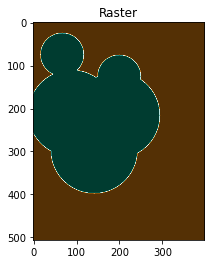

In [75]:
plt.imshow(grav_big, cmap="BrBG")
plt.title("Raster")
plt.show()

In [78]:
grav_big

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [83]:
for i in range(len(grav_big)):
    for j in range(len(grav_big[1])):
        if grav_big[i][j]==0:
            grav_big[i][j]=1
        else:
            grav_big[i][j]=0
            

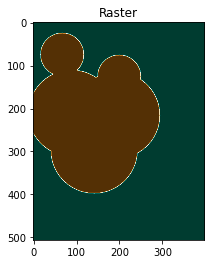

In [87]:
plt.imshow(grav_big, cmap="BrBG")
plt.title("Raster")
plt.show()

In [91]:
outputPath = r'EU_data/zonal_accessibility_2.tif'
cv2.imwrite(outputPath, grav_big)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

In [37]:
file_path=r'EU_data/zon_acc_big_3.tif'
with rio.open(file_path) as dem_src:
    grav_big= dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [38]:
file_path=r'EU_data/zon_acc_small_3.tif'
with rio.open(file_path) as dem_src:
    grav_small= dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [39]:
file_path=r'EU_data/mumbai_raster.tif'
with rio.open(file_path) as dem_src:
    mumbai= dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [40]:
np.unique(grav_big)

array([0, 1, 2, 3, 4], dtype=uint8)

In [41]:
for i in range(len(grav_big)):
    for j in range(len(grav_big[1])):
        if grav_big[i][j]==4:
            grav_big[i][j]=5
        elif grav_big[i][j]==3:
            grav_big[i][j]=4
        elif grav_big[i][j]==2:
            grav_big[i][j]=3
        elif grav_big[i][j]==1:
            grav_big[i][j]=2

In [42]:
for i in range(len(grav_big)):
    for j in range(len(grav_big[1])):
        if grav_small[i][j]==0:
            if grav_big[i][j]>0:
                grav_big[i][j]=1
            

In [43]:
for i in range(len(grav_big)):
    for j in range(len(grav_big[1])):
        if grav_small[i][j]==1:
            if grav_big[i][j]>2:
                grav_big[i][j]=2

In [44]:
np.unique(grav_big)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

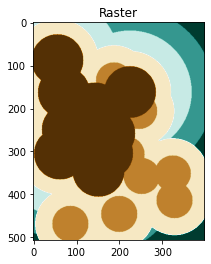

In [45]:
plt.imshow(grav_big, cmap="BrBG")
plt.title("Raster")
plt.show()

In [46]:
for i in range(len(grav_big)):
    for j in range(len(grav_big[1])):
        if grav_big[i][j]==5:
            grav_big[i][j]=6
        elif grav_big[i][j]==4:
            grav_big[i][j]=5
        elif grav_big[i][j]==3:
            grav_big[i][j]=4
        elif grav_big[i][j]==2:
            grav_big[i][j]=3
        elif grav_big[i][j]==1:
            grav_big[i][j]=2
        elif grav_big[i][j]==0:
            grav_big[i][j]=1

In [48]:
for i in range(len(grav_big)):
    for j in range(len(grav_big[1])):
        if mumbai[i][j]==1:
            grav_big[i][j]=0
            

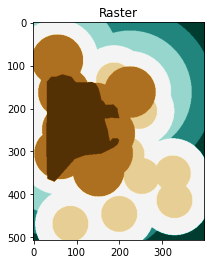

In [49]:
plt.imshow(grav_big, cmap="BrBG")
plt.title("Raster")
plt.show()

In [57]:
outputPath = r'EU_data/zonal_accessibility_7.tif'
cv2.imwrite(outputPath, grav_big)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0